In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
genome_tags = pd.read_csv('genome_tags.csv')
genome_scores = pd.read_csv('genome_scores.csv')
movies = pd.read_csv('movie.csv')
ratings = pd.read_csv('rating.csv')
links = pd.read_csv('link.csv')
tags = pd.read_csv('tag.csv')

Ratings + Movies

In [3]:
merge_movies = pd.merge(ratings, movies, on='movieId', how='left')
genome = pd.merge(genome_scores, genome_tags, on='tagId', how='left')

In [4]:
tagged_scores = pd.merge(genome_tags, genome_scores, on="tagId")  

# Ajoute les titres de films
tagged_movies = pd.merge(tagged_scores, movies, on="movieId")


Donc, j'ai structuré les bases de données en 3 bases de données concrètes

In [5]:
merge_movies.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,2005-04-02 23:29:40,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [6]:
merge_movies.shape

(20000263, 6)

In [7]:
merge_movies.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [8]:
merge_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
 4   title      object 
 5   genres     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 915.5+ MB


In [10]:
merge_movies['timestamp'] = pd.to_datetime(merge_movies['timestamp'])

In [11]:
merge_movies.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,2005-04-02 23:29:40,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [26]:
# Trouver l'utilisateur ayant noté (regardé) le plus de films
top_user = merge_movies['userId'].value_counts().idxmax()
top_user_count = merge_movies['userId'].value_counts().max()
print(f"L'utilisateur ayant regardé le plus de films est l'utilisateur {top_user} avec {top_user_count} films notés.")

L'utilisateur ayant regardé le plus de films est l'utilisateur 118205 avec 9254 films notés.


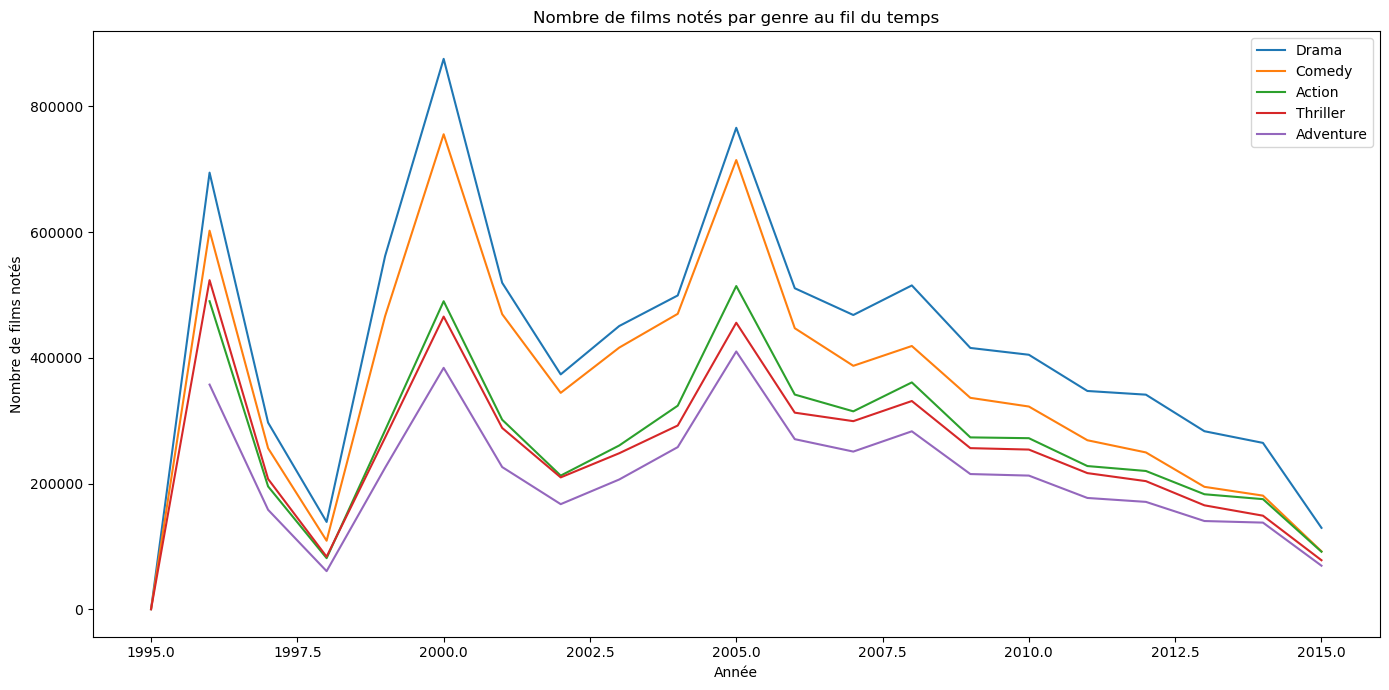

In [17]:
# Extraire l'année à partir du timestamp
merge_movies['year'] = merge_movies['timestamp'].dt.year

# Compter le nombre de films par genre et par année
# On sépare les genres multiples
genres_year = merge_movies.dropna(subset=['genres', 'year']).copy()
genres_year = genres_year.assign(genres=genres_year['genres'].str.split('|')).explode('genres')

# Grouper par année et genre
genre_counts = genres_year.groupby(['year', 'genres']).size().reset_index(name='count')

# Tracer le graphique pour les genres les plus fréquents
top_genres = genre_counts.groupby('genres')['count'].sum().sort_values(ascending=False).head(5).index
plt.figure(figsize=(14, 7))
for genre in top_genres:
    data = genre_counts[genre_counts['genres'] == genre]
    plt.plot(data['year'], data['count'], label=genre)

plt.xlabel('Année')
plt.ylabel('Nombre de films notés')
plt.title('Nombre de films notés par genre au fil du temps')
plt.legend()
plt.tight_layout()
plt.show()

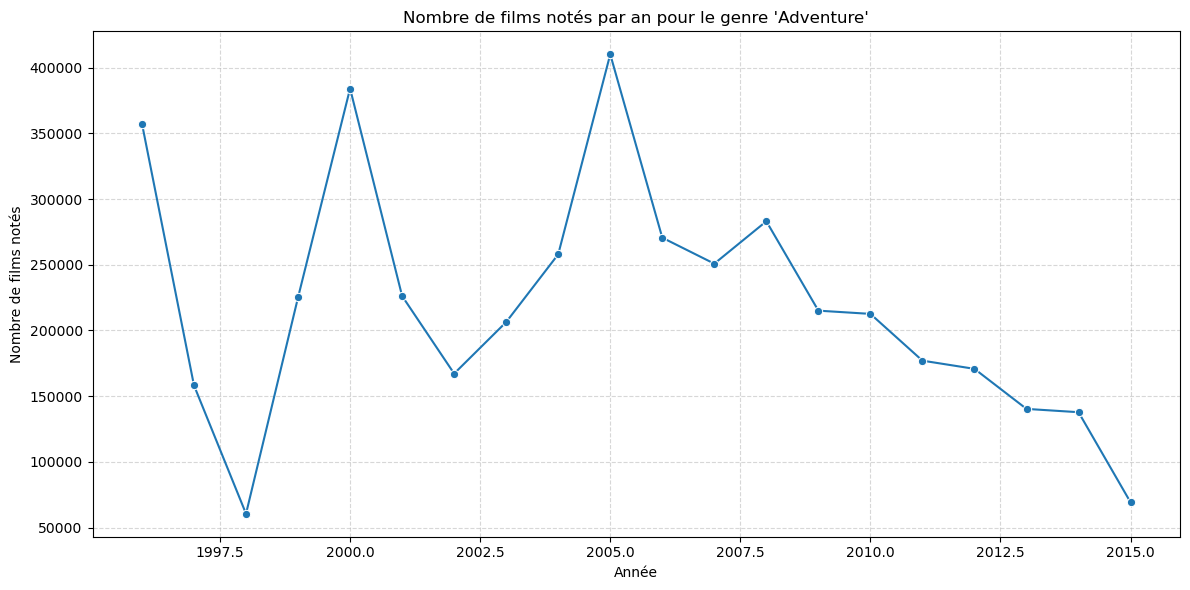

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='year', y='count', marker='o')
plt.title(f"Nombre de films notés par an pour le genre '{genre}'")
plt.xlabel('Année')
plt.ylabel('Nombre de films notés')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

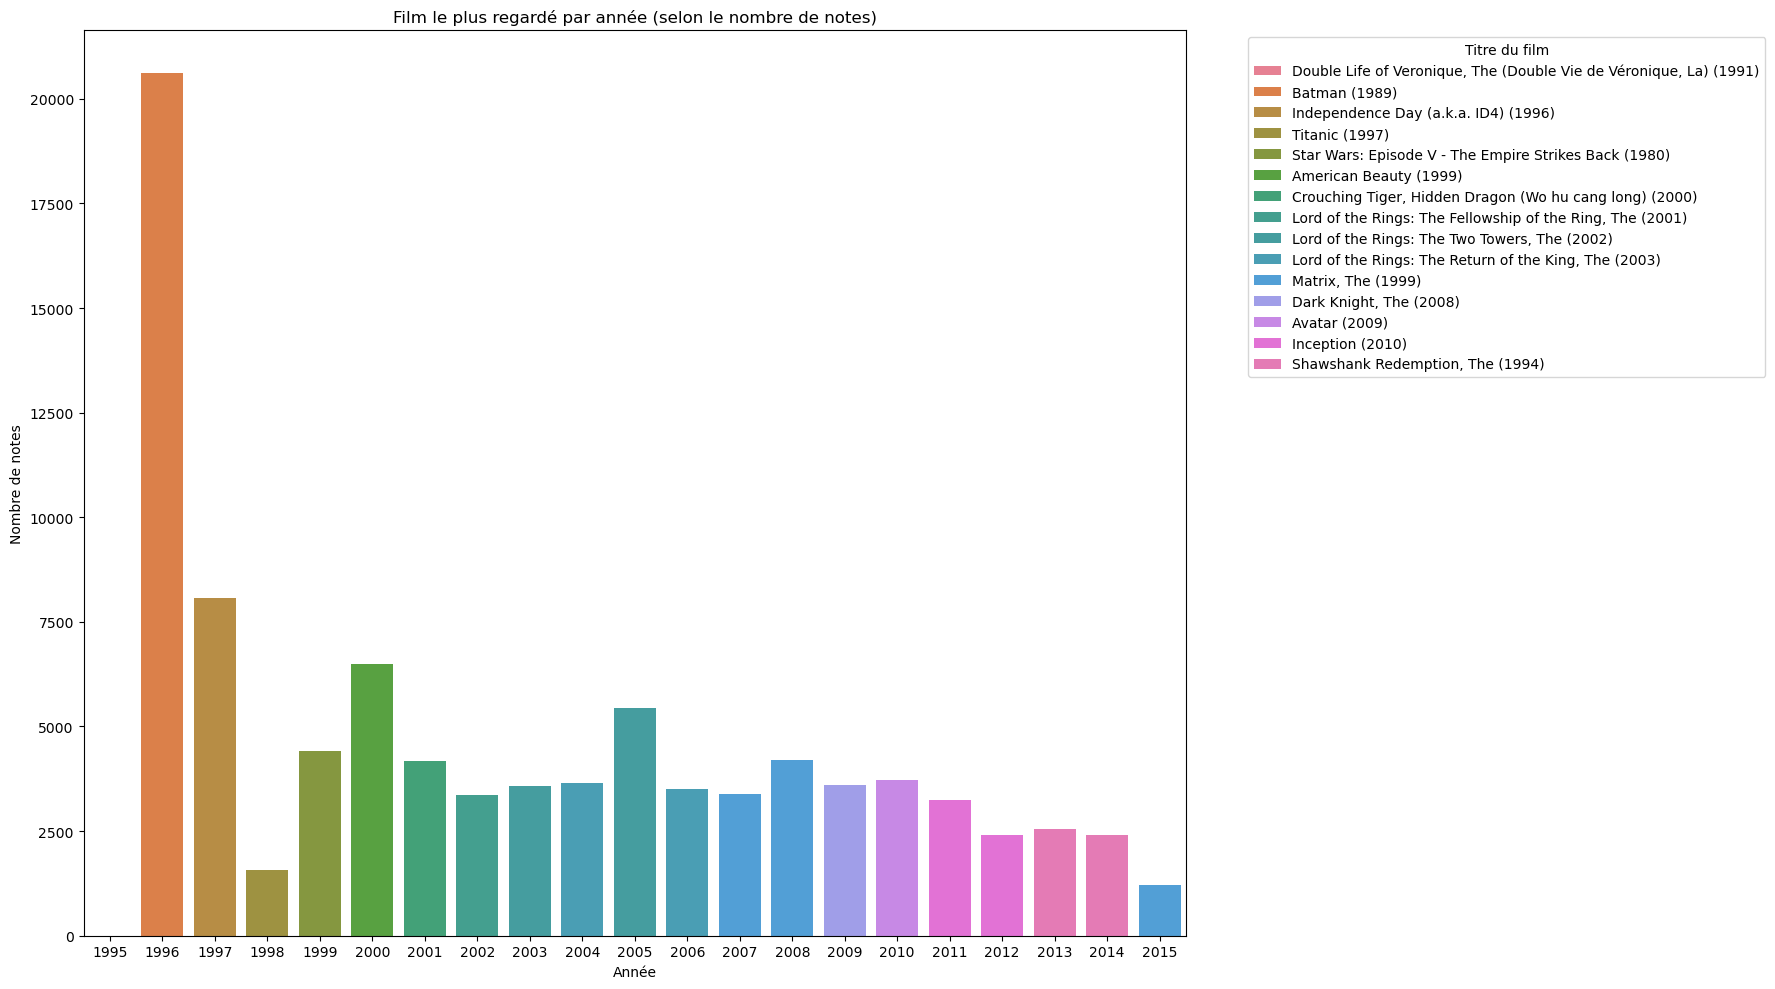

In [21]:
# Calculer le nombre de notes par film et par année
movies_per_year = merge_movies.groupby(['year', 'title']).size().reset_index(name='count')

# Pour chaque année, sélectionner le film le plus noté
top_movies_per_year = movies_per_year.loc[movies_per_year.groupby('year')['count'].idxmax()]

plt.figure(figsize=(18, 10))
sns.barplot(data=top_movies_per_year, x='year', y='count', hue='title', dodge=False)
plt.title('Film le plus regardé par année (selon le nombre de notes)')
plt.xlabel('Année')
plt.ylabel('Nombre de notes')
plt.legend(title='Titre du film', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [25]:
merge_movies['rating'].value_counts().sort_values(ascending=True)

rating
0.5     239125
1.5     279252
1.0     680732
2.5     883398
2.0    1430997
4.5    1534824
3.5    2200156
5.0    2898660
3.0    4291193
4.0    5561926
Name: count, dtype: int64

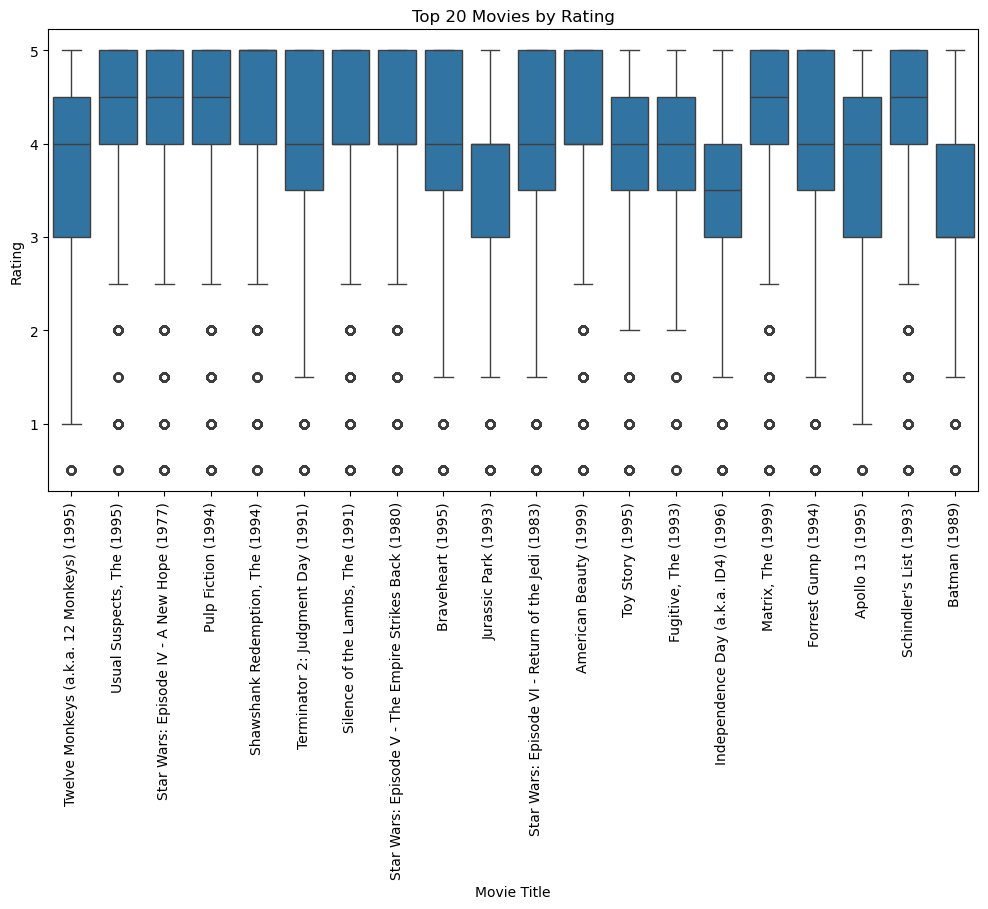

In [15]:
plt.figure(figsize=(12, 6))
top_movies = merge_movies['title'].value_counts().head(20).index
sns.boxplot(data=merge_movies[merge_movies['title'].isin(top_movies)], x='title', y='rating')
plt.xticks(rotation=90)
plt.title('Top 20 Movies by Rating')
plt.xlabel('Movie Title')
plt.ylabel('Rating')
plt.tight_layout
plt.show()

/var/folders/zl/71xrz48s5c1glhcyx_5gvjqc0000gn/T/ipykernel_5982/877567122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_ratings.index, y=mean_ratings.values, palette="viridis")


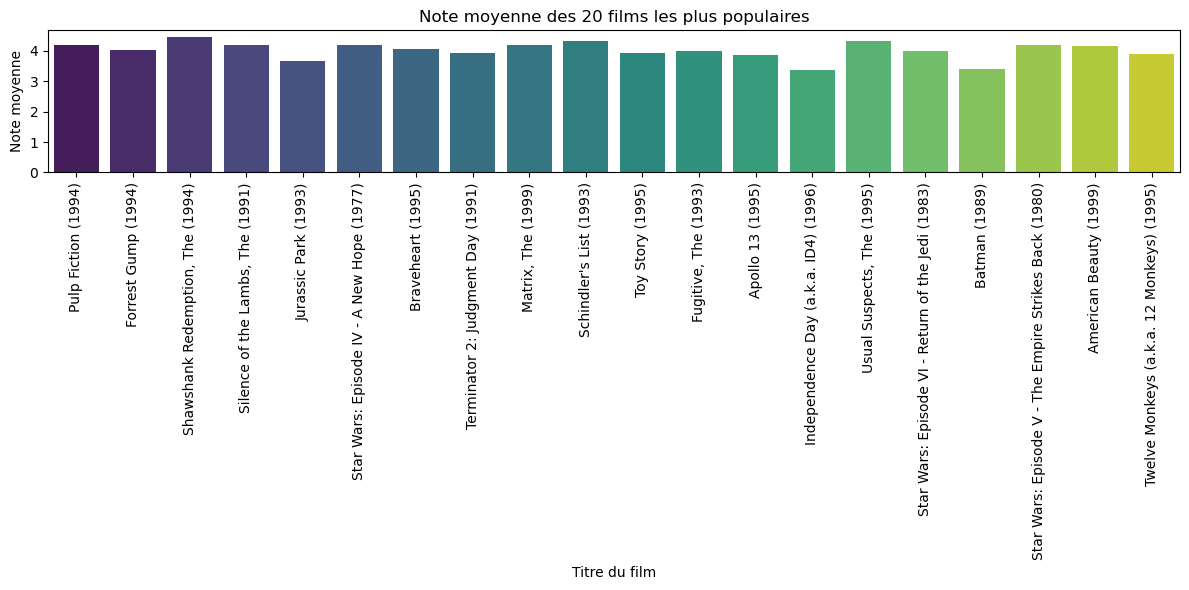

In [16]:
plt.figure(figsize=(12, 6))
mean_ratings = merge_movies.groupby('title')['rating'].mean().loc[top_movies]
sns.barplot(x=mean_ratings.index, y=mean_ratings.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Note moyenne des 20 films les plus populaires')
plt.xlabel('Titre du film')
plt.ylabel('Note moyenne')
plt.tight_layout()
plt.show()

In [27]:
genome.head()

,movieId,tagId,relevance,tag
0,1,1,0.02500,007
1,1,2,0.02500,007 (series)
2,1,3,0.05775,18th century
3,1,4,0.09675,1920s
4,1,5,0.14675,1930s


In [31]:
genome['relevance'].value_counts()

relevance
0.01400    37940
0.01275    37920
0.01325    37823
0.01250    37820
0.01225    37812
           ...  
0.95850       90
0.91225       89
0.86425       88
0.95575       81
0.00025        7
Name: count, Length: 4000, dtype: int64

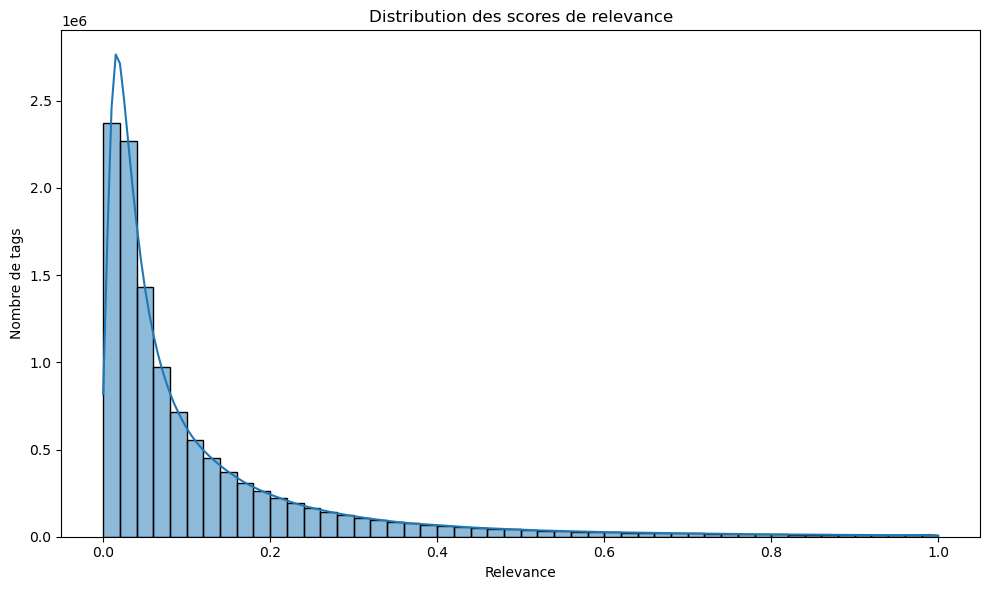

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(genome_scores['relevance'], bins=50, kde=True)
plt.title('Distribution des scores de relevance')
plt.xlabel('Relevance')
plt.ylabel('Nombre de tags')
plt.tight_layout()
plt.show()